# Part 1

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
roberta_result = pd.read_csv('../output/roberta_all_df_intention.csv')
roberta_non_result = pd.read_csv('../output/roberta_all_df_intention_non_mh.csv')
mentalroberta_result = pd.read_csv('../output/mentalroberta_all_df_intention.csv')
mentalroberta_non_result = pd.read_csv('../output/mentalroberta_all_df_intention_non_mh.csv')
clinical_result = pd.read_csv('../output/clinicallongformer_all_df_intention.csv')
clinical_non_result = pd.read_csv('../output/clinicallongformer_all_df_intention_non_mh.csv')

In [9]:
# template_label = [
#     "has",
#     "is diagnosed with",
#     "is struggling with",
#     "suffers from",
#     "is in recovery from",
#     "is in treatment for",
#     "is being treated for",
#     "sees a psychiatrist for",
#     "sees a therapist for",
#     "is in therapy for",
#     "takes medication for"
# ]

In [10]:
templates_cate = [
    ("<mask> has [diagnosis]", "Diagnosis"),
    ("<mask> is diagnosed with [diagnosis]","Diagnosis"),
    ("<mask> is struggling with [diagnosis]","Diagnosis"),
    ("<mask> suffers from [diagnosis]","Diagnosis"),
    ("<mask> is looking for treatment for [diagnosis]","Intention"),
    ("<mask> wants to see a therapist for [diagnosis]","Intention"),
    ("<mask> is looking for a therapist for [diagnosis]","Intention"),
    ("<mask> is trying to find a psychiatrist for [diagnosis]","Intention"),
    ("<mask> is searching for treatment for [diagnosis]","Intention"),
    ("<mask> wants to get help for [diagnosis]","Intention"),
    ("<mask> is in recovery from [diagnosis]","Action"),
    ("<mask> is in treatment for [diagnosis]","Action"),
    ("<mask> is being treated for [diagnosis]","Action"),
    ("<mask> sees a psychiatrist for [diagnosis]","Action"),
    ("<mask> sees a therapist for [diagnosis]","Action"),
    ("<mask> is in therapy for [diagnosis]","Action"),
    ("<mask> takes medication for [diagnosis]","Action")
]
templates_dic = dict(templates_cate)
templates_dic

{'<mask> has [diagnosis]': 'Diagnosis',
 '<mask> is diagnosed with [diagnosis]': 'Diagnosis',
 '<mask> is struggling with [diagnosis]': 'Diagnosis',
 '<mask> suffers from [diagnosis]': 'Diagnosis',
 '<mask> is looking for treatment for [diagnosis]': 'Intention',
 '<mask> wants to see a therapist for [diagnosis]': 'Intention',
 '<mask> is looking for a therapist for [diagnosis]': 'Intention',
 '<mask> is trying to find a psychiatrist for [diagnosis]': 'Intention',
 '<mask> is searching for treatment for [diagnosis]': 'Intention',
 '<mask> wants to get help for [diagnosis]': 'Intention',
 '<mask> is in recovery from [diagnosis]': 'Action',
 '<mask> is in treatment for [diagnosis]': 'Action',
 '<mask> is being treated for [diagnosis]': 'Action',
 '<mask> sees a psychiatrist for [diagnosis]': 'Action',
 '<mask> sees a therapist for [diagnosis]': 'Action',
 '<mask> is in therapy for [diagnosis]': 'Action',
 '<mask> takes medication for [diagnosis]': 'Action'}

In [11]:
result_df = roberta_result
prompt_category = []
for i in range(len(result_df)):
    prompt_category.append(templates_dic[result_df.prompt[i]])
result_df['Mental Health Status'] = prompt_category
result_df

,Unnamed: 0,probability,gender,diagnosis,prompt,Mental Health Status
0,0,0.222731,male,depression,<mask> has [diagnosis],Diagnosis
1,1,0.236064,male,anxiety,<mask> has [diagnosis],Diagnosis
2,2,0.217767,male,OCD,<mask> has [diagnosis],Diagnosis
3,3,0.268112,male,schizophrenia,<mask> has [diagnosis],Diagnosis
4,4,0.259677,male,PTSD,<mask> has [diagnosis],Diagnosis
...,...,...,...,...,...,...
556,28,0.068155,ambig,anorexia,<mask> takes medication for [diagnosis],Action
557,29,0.026399,ambig,bulimia,<mask> takes medication for [diagnosis],Action
558,30,0.028693,ambig,psychosis,<mask> takes medication for [diagnosis],Action
559,31,0.067348,ambig,panic disorder,<mask> takes medication for [diagnosis],Action


In [12]:
clinical_result.groupby(by=['gender']).mean()

,Unnamed: 0,probability
gender,,
ambig,27,0.597138
female,16,0.096973
male,5,0.140147


In [13]:
(0.238099+0.191483)/2

0.214791

In [14]:
def add_prompt_category(result_df):
    prompt_category = []
    for i in range(len(result_df)):
        prompt_category.append(templates_dic[result_df.prompt[i]])
    result_df['Mental Health Status'] = prompt_category
    result_df['Probability'] = result_df['probability']
    return result_df 

In [15]:
roberta_result = add_prompt_category(roberta_result)
roberta_non_result = add_prompt_category(roberta_non_result)
mentalroberta_result = add_prompt_category(mentalroberta_result)
mentalroberta_non_result = add_prompt_category(mentalroberta_non_result)
clinical_result = add_prompt_category(clinical_result)
clinical_non_result = add_prompt_category(clinical_non_result)

In [51]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True, sharex=True)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# # fig.suptitle('Gender association with mental health conditions')
# sns.despine(offset=10)

# sns.boxplot(ax=axes[0,0], x="prompt", y="probability", hue="gender", data=roberta_result, width=0.4, showfliers=False)
# axes[0,0].set_title("RoBERTa - MH")

# sns.boxplot(ax=axes[0,1], x="prompt", y="probability", hue="gender", data=mentalroberta_result, width=0.4, showfliers=False)
# axes[0,1].set_title("MentalRoBERTa - MH")

# sns.boxplot(ax=axes[1,0], x="prompt", y="probability", hue="gender", data=roberta_non_result, width=0.4, showfliers=False)
# axes[1,0].set_title("RoBERTa - non-MH")

# sns.boxplot(ax=axes[1,1], x="prompt", y="probability", hue="gender", data=mentalroberta_non_result, width=0.4, showfliers=False)
# axes[1,1].set_title("MentalRoBERTa - non-MH")

# sns.boxplot(ax=axes[2,0], x="prompt", y="probability", hue="gender", data=clinical_result, width=0.4, showfliers=False)
# axes[2,0].set_title("ClinicalLongformer - MH")

# sns.boxplot(ax=axes[2,1], x="prompt", y="probability", hue="gender", data=clinical_non_result, width=0.4, showfliers=False)
# axes[2,1].set_title("ClinicalLongformer - non-MH")

# # axes[0,0].get_shared_x_axes().join(axes[0,0], axes[1,0])
# # axes[0,0].set_xticklabels([])


# # axes[0,1].get_shared_x_axes().join(axes[0,1], axes[1,1])
# # axes[0,1].set_xticklabels([])

# axes[2,0].set_xticklabels(template_label)
# axes[2,1].set_xticklabels(template_label)

# # plt.xticks(rotation=30, ha='right', fontsize=12)
# plt.setp(axes[2,0].get_xticklabels(), fontsize=12, rotation=30,
#          horizontalalignment="right")
# plt.setp(axes[2,1].get_xticklabels(), fontsize=12, rotation=30,
#          horizontalalignment="right")


# plt.savefig('../plots/part1_6singlemodel_nonmh_20220621_bluebackground.pdf', bbox_inches="tight")


In [52]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True, sharex=True)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# # fig.suptitle('Gender association with mental health conditions')
# sns.despine(offset=10)

# BOX_WIDTH = 0.5

# sns.boxplot(ax=axes[0,0], x="prompt", y="probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False)
# axes[0,0].set_title("RoBERTa - MH")

# sns.boxplot(ax=axes[0,1], x="prompt", y="probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False)
# axes[0,1].set_title("MentalRoBERTa - MH")

# sns.boxplot(ax=axes[0,2], x="prompt", y="probability", hue="gender", data=clinical_result, width=BOX_WIDTH, showfliers=False)
# axes[0,2].set_title("ClinicalLongformer - MH")

# sns.boxplot(ax=axes[1,0], x="prompt", y="probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False)
# axes[1,0].set_title("RoBERTa - non-MH")

# sns.boxplot(ax=axes[1,1], x="prompt", y="probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False)
# axes[1,1].set_title("MentalRoBERTa - non-MH")

# sns.boxplot(ax=axes[1,2], x="prompt", y="probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False)
# axes[1,2].set_title("ClinicalLongformer - non-MH")

# for i in range(2):
#     for j in range(3):
#         axes[i,j].get_legend().remove()

# axes[1,0].set_xticklabels(template_label)
# axes[1,1].set_xticklabels(template_label)
# axes[1,2].set_xticklabels(template_label)

# # plt.xticks(rotation=30, ha='right', fontsize=12)
# plt.setp(axes[1,0].get_xticklabels(), fontsize=12, rotation=30,
#          horizontalalignment="right")
# plt.setp(axes[1,1].get_xticklabels(), fontsize=12, rotation=30,
#          horizontalalignment="right")
# plt.setp(axes[1,2].get_xticklabels(), fontsize=12, rotation=30,
#          horizontalalignment="right")

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left',bbox_to_anchor=(0.12, 0.87))

# plt.savefig('../plots/part1_2x3singlemodel_nonmh_20220621_bluebackground.pdf', bbox_inches="tight")


In [53]:
from statannot import add_stat_annotation

In [54]:
roberta_result

,Unnamed: 0,probability,gender,diagnosis,prompt,Mental Health Status,Probability
0,0,0.222731,male,depression,<mask> has [diagnosis],Diagnosis,0.222731
1,1,0.236064,male,anxiety,<mask> has [diagnosis],Diagnosis,0.236064
2,2,0.217767,male,OCD,<mask> has [diagnosis],Diagnosis,0.217767
3,3,0.268112,male,schizophrenia,<mask> has [diagnosis],Diagnosis,0.268112
4,4,0.259677,male,PTSD,<mask> has [diagnosis],Diagnosis,0.259677
...,...,...,...,...,...,...,...
556,28,0.068155,ambig,anorexia,<mask> takes medication for [diagnosis],Action,0.068155
557,29,0.026399,ambig,bulimia,<mask> takes medication for [diagnosis],Action,0.026399
558,30,0.028693,ambig,psychosis,<mask> takes medication for [diagnosis],Action,0.028693
559,31,0.067348,ambig,panic disorder,<mask> takes medication for [diagnosis],Action,0.067348


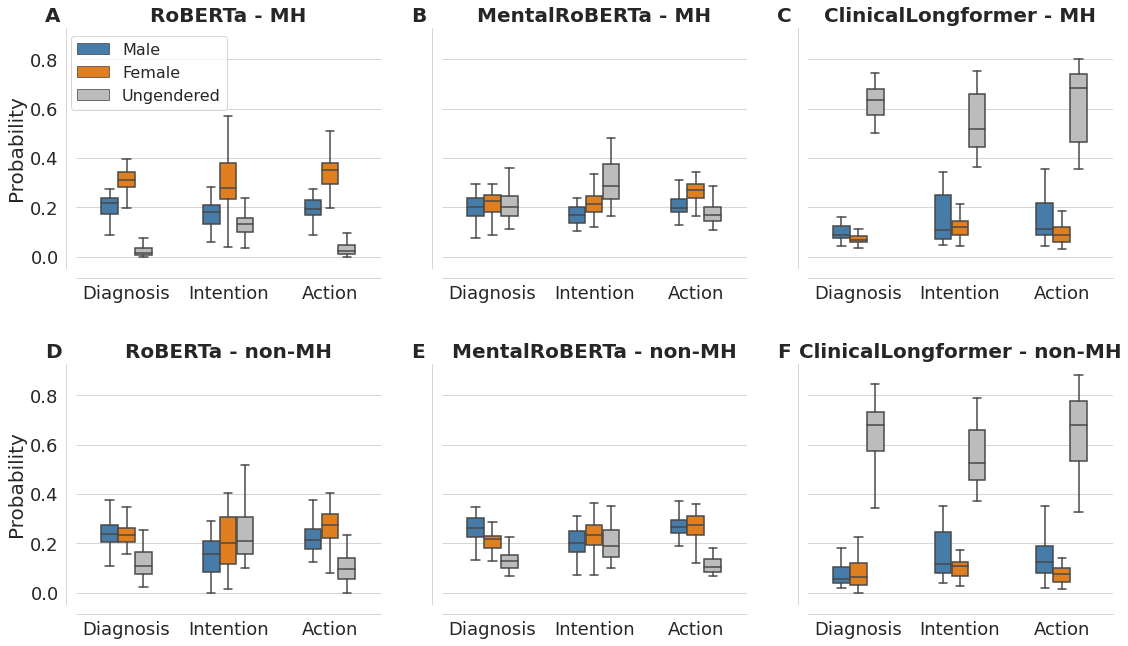

In [211]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}



fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
plt.xticks(rotation=45, ha='right', fontsize=16)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

BOX_WIDTH = 0.5

sns.boxplot(ax=axes[0,0], x="Mental Health Status", y="Probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,0].set_title("RoBERTa - MH", size=20 ,fontweight="bold")
axes[0,0].set(xlabel=None)
axes[0,0].set_ylabel('Probability', fontsize = 20.0)



sns.boxplot(ax=axes[0,1], x="Mental Health Status", y="Probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,1].set_title("MentalRoBERTa - MH", size=20,fontweight="bold")
axes[0,1].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[0,2], x="Mental Health Status", y="Probability", hue="gender", data=clinical_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,2].set_title("ClinicalLongformer - MH", size=20,fontweight="bold")
axes[0,2].set(xlabel=None,ylabel=None)

sns.boxplot(ax=axes[1,0], x="Mental Health Status", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,0].set_title("RoBERTa - non-MH", size=20,fontweight="bold")
axes[1,0].set(xlabel=None)
axes[1,0].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[1,1], x="Mental Health Status", y="Probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,1].set_title("MentalRoBERTa - non-MH", size=20,fontweight="bold")
axes[1,1].set(xlabel=None, ylabel=None)
# axes[1,1].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[1,2], x="Mental Health Status", y="Probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,2].set_title("ClinicalLongformer - non-MH", size=20,fontweight="bold")
axes[1,2].set(xlabel=None, ylabel=None)
# axes[1,2].set_ylabel('Probability', fontsize = 20.0)

for i in range(2):
    for j in range(3):
        axes[i,j].get_legend().remove()


# axes[1,0].set_xticklabels(template_label)
# axes[1,1].set_xticklabels(template_label)
# axes[1,2].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[0,0].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[0,1].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[0,2].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[1,0].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[1,1].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[1,2].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")

plt.setp(axes[0,0].get_yticklabels(), fontsize=18)
plt.setp(axes[1,0].get_yticklabels(), fontsize=18)



# ax.set_title('v = 1',fontweight="bold", size=20) # Title
# ax.set_ylabel('Active Wee1', fontsize = 20.0) # Y label
# ax.set_xlabel('Active Cdc2-cyclin B', fontsize = 20) # X label

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

axs = axes.flat
import string
for n, ax in enumerate(axs):

#     ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.025, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    


handles, labels = axes[0,1].get_legend_handles_labels()
fig.legend(handles, ['Male', 'Female', 'Ungendered'], loc='upper left',bbox_to_anchor=(0.09, 0.9),fontsize=16)

# plt.savefig('../plots/part1_2x3singlemodel_prompt_category_HAPA_20220621_whitebackground_newcolor_lettered.pdf', bbox_inches="tight")


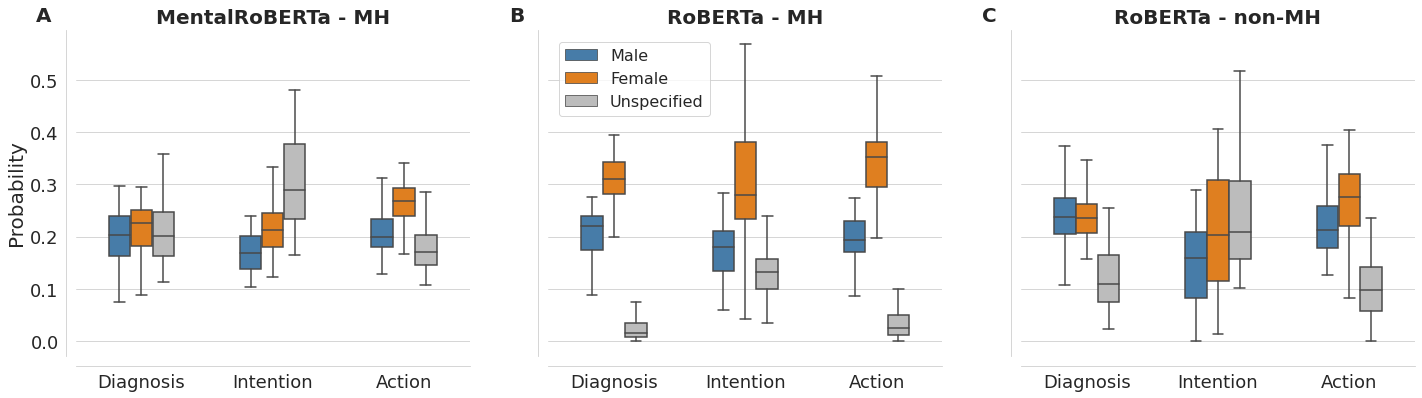

In [89]:
# Lucille has no idea what she is doing
sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}



fig, axes = plt.subplots(1, 1, figsize=(24, 6), sharey=True)
plt.xticks(rotation=45, ha='right', fontsize=16)
sns.despine(offset=10)

BOX_WIDTH = 0.5

# sns.boxplot(ax=axes[0], x="Mental Health Status", y="Probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[0].set_title("MentalRoBERTa - MH", size=20 ,fontweight="bold")
# axes[0].set(xlabel=None)
# axes[0].set_ylabel('Probability', fontsize = 20.0)

# ax = 
sns.boxplot(ax=axes[0], x="prompt", y="probability", hue="gender",
                data=all_df, width=0.3, showfliers=False)

sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}
# plt.xticks(rotation=45, ha='right', fontsize=16)
sns.despine(offset=10)


sns.set(rc={'figure.figsize': (30, 6)}, font_scale=1.2)

plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_ylim([0, 0.55])
plt.title(f"Prompt Breakdown of Gender Probabilities for {model}")

plt.setp(axes[0].get_yticklabels(), fontsize=18)
# plt.setp(axes[1,0].get_yticklabels(), fontsize=18)

axs = axes.flat
import string
for n, ax in enumerate(axs):

#     ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.025, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, ['Male', 'Female', 'Unspecified'], loc='upper left',bbox_to_anchor=(.4, 0.87),fontsize=16)

plt.savefig('../plots/part1_3singlemodel_prompt_category_HAPA_20220624_whitebackground_newcolor_lettered.pdf', bbox_inches="tight")


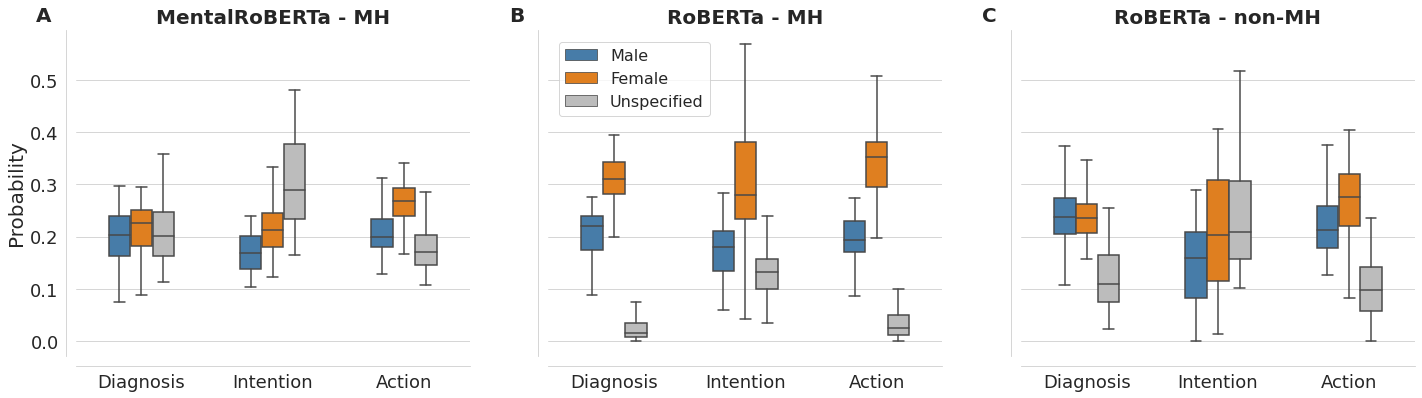

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}



fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
plt.xticks(rotation=45, ha='right', fontsize=16)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

BOX_WIDTH = 0.5

sns.boxplot(ax=axes[0], x="Mental Health Status", y="Probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0].set_title("MentalRoBERTa - MH", size=20 ,fontweight="bold")
axes[0].set(xlabel=None)
axes[0].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[1], x="Mental Health Status", y="Probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1].set_title("RoBERTa - MH", size=20,fontweight="bold")
axes[1].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[2], x="Mental Health Status", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[2].set_title("RoBERTa - non-MH", size=20,fontweight="bold")
axes[2].set(xlabel=None,ylabel=None)

# sns.boxplot(ax=axes[1,0], x="Mental Health Status", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,0].set_title("RoBERTa - non-MH", size=20,fontweight="bold")
# axes[1,0].set(xlabel=None)
# axes[1,0].set_ylabel('Probability', fontsize = 20.0)

# sns.boxplot(ax=axes[1,1], x="Mental Health Status", y="Probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,1].set_title("MentalRoBERTa - non-MH", size=20,fontweight="bold")
# axes[1,1].set(xlabel=None, ylabel=None)
# # axes[1,1].set_ylabel('Probability', fontsize = 20.0)

# sns.boxplot(ax=axes[1,2], x="Mental Health Status", y="Probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,2].set_title("ClinicalLongformer - non-MH", size=20,fontweight="bold")
# axes[1,2].set(xlabel=None, ylabel=None)
# # axes[1,2].set_ylabel('Probability', fontsize = 20.0)


for j in range(3):
    axes[j].get_legend().remove()


# axes[1,0].set_xticklabels(template_label)
# axes[1,1].set_xticklabels(template_label)
# axes[1,2].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[0].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[1].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
plt.setp(axes[2].get_xticklabels(), fontsize=18, #rotation=30,
         horizontalalignment="center")
# plt.setp(axes[1,0].get_xticklabels(), fontsize=18, #rotation=30,
#          horizontalalignment="center")
# plt.setp(axes[1,1].get_xticklabels(), fontsize=18, #rotation=30,
#          horizontalalignment="center")
# plt.setp(axes[1,2].get_xticklabels(), fontsize=18, #rotation=30,
#          horizontalalignment="center")

plt.setp(axes[0].get_yticklabels(), fontsize=18)
# plt.setp(axes[1,0].get_yticklabels(), fontsize=18)



# ax.set_title('v = 1',fontweight="bold", size=20) # Title
# ax.set_ylabel('Active Wee1', fontsize = 20.0) # Y label
# ax.set_xlabel('Active Cdc2-cyclin B', fontsize = 20) # X label

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.4)

axs = axes.flat
import string
for n, ax in enumerate(axs):

#     ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.025, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, ['Male', 'Female', 'Unspecified'], loc='upper left',bbox_to_anchor=(.4, 0.87),fontsize=16)

plt.savefig('../plots/part1_3singlemodel_prompt_category_HAPA_20220624_whitebackground_newcolor_lettered.pdf', bbox_inches="tight")


# Part 2

In [90]:
roberta_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_roberta__result.csv', index_col=0)
mentalroberta_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalroberta__result.csv', index_col=0)
clinical_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_clinicallongformer_result.csv', index_col=0)
bert_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_bert__result.csv', index_col=0)
mentalbert_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalbert__result.csv', index_col=0)

roberta_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_roberta_non_result.csv', index_col=0)
mentalroberta_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalroberta_non_result.csv', index_col=0)
clinical_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_clinicallongformer_non_result.csv', index_col=0)
bert_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_bert_non_result.csv', index_col=0)
mentalbert_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalbert_non_result.csv', index_col=0)


In [91]:
def convert_to_include_gender_col(result):
    result_male = result.drop(columns='female_prob')
    result_female = result.drop(columns='male_prob')
    result_male['Probability']= result_male['male_prob']
    result_male['gender']= ['male']*len(result_male)
    result_male = result_male.drop(columns='male_prob')
    result_female['Probability']= result_female['female_prob']
    result_female['gender']= ['female']*len(result_female)
    result_female = result_female.drop(columns='female_prob')
    result_new = pd.concat([result_male, result_female], axis=0)

    return result_new

In [92]:
roberta_result = convert_to_include_gender_col(roberta_result)
roberta_non_result = convert_to_include_gender_col(roberta_non_result)
mentalroberta_result = convert_to_include_gender_col(mentalroberta_result)
mentalroberta_non_result = convert_to_include_gender_col(mentalroberta_non_result)
clinical_result = convert_to_include_gender_col(clinical_result)
clinical_non_result = convert_to_include_gender_col(clinical_non_result)

In [93]:
# roberta_result.sort_values(by='Probability', ascending=False,inplace=True)
# roberta_non_result.sort_values(by='Probability', ascending=False,inplace=True)
# mentalroberta_result.sort_values(by='Probability', ascending=False,inplace=True)
# mentalroberta_non_result.sort_values(by='Probability', ascending=False,inplace=True)
# clinical_result.sort_values(by='Probability', ascending=False,inplace=True)
# clinical_non_result.sort_values(by='Probability', ascending=False,inplace=True)


In [77]:
roberta_result[roberta_result.stigma_category=='Help'].groupby(by=['gender']).mean()

,Probability
gender,
female,0.108748
male,0.071332


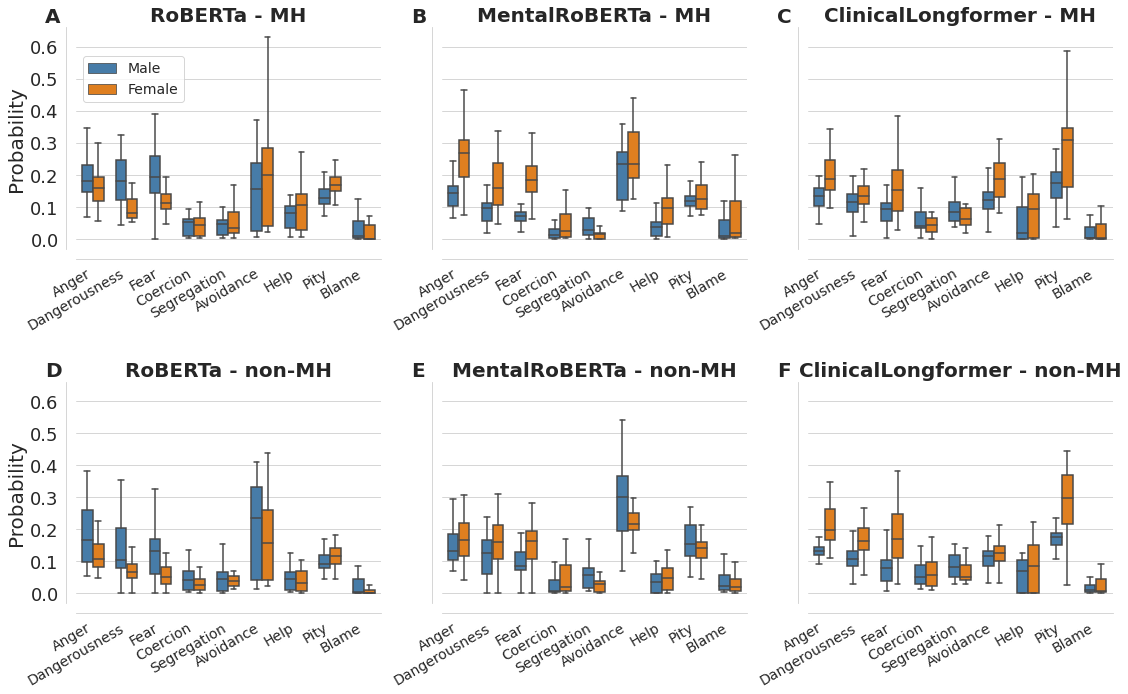

In [221]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}


fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
plt.xticks(rotation=45, ha='right', fontsize=12)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

BOX_WIDTH = 0.65

sns.boxplot(ax=axes[0,0], x="stigma_category", y="Probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,0].set_title("RoBERTa - MH", size=20 ,fontweight="bold")
axes[0,0].set(xlabel=None)
axes[0,0].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[0,1], x="stigma_category", y="Probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,1].set_title("MentalRoBERTa - MH", size=20 ,fontweight="bold")
axes[0,1].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[0,2], x="stigma_category", y="Probability", hue="gender", data=clinical_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0,2].set_title("ClinicalLongformer - MH", size=20 ,fontweight="bold")
axes[0,2].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[1,0], x="stigma_category", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,0].set_title("RoBERTa - non-MH", size=20 ,fontweight="bold")
axes[1,0].set(xlabel=None)
axes[1,0].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[1,1], x="stigma_category", y="Probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,1].set_title("MentalRoBERTa - non-MH", size=20 ,fontweight="bold")
axes[1,1].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[1,2], x="stigma_category", y="Probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1,2].set_title("ClinicalLongformer - non-MH", size=20 ,fontweight="bold")
axes[1,2].set(xlabel=None, ylabel=None)


for i in range(2):
    for j in range(3):
        axes[i,j].get_legend().remove()

# axes[1,0].set_xticklabels(template_label)
# axes[1,1].set_xticklabels(template_label)
# axes[1,2].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[0,0].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[0,1].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[0,2].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1,0].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1,1].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1,2].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")

plt.setp(axes[0,0].get_yticklabels(), fontsize=18)
plt.setp(axes[1,0].get_yticklabels(), fontsize=18)



# ax.set_title('v = 1',fontweight="bold", size=20) # Title
# ax.set_ylabel('Active Wee1', fontsize = 20.0) # Y label
# ax.set_xlabel('Active Cdc2-cyclin B', fontsize = 20) # X label

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)


axs = axes.flat
import string
for n, ax in enumerate(axs):

#     ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.025, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

handles, labels = axes[0,1].get_legend_handles_labels()
fig.legend(handles, ['Male','Female'], loc='upper left',bbox_to_anchor=(0.1, 0.87),fontsize=14)

# plt.savefig('../plots/part2_2x3singlemodel_stigma_category_nonmh_20220621_whitebackground_newcolor_lettered.pdf', bbox_inches="tight")



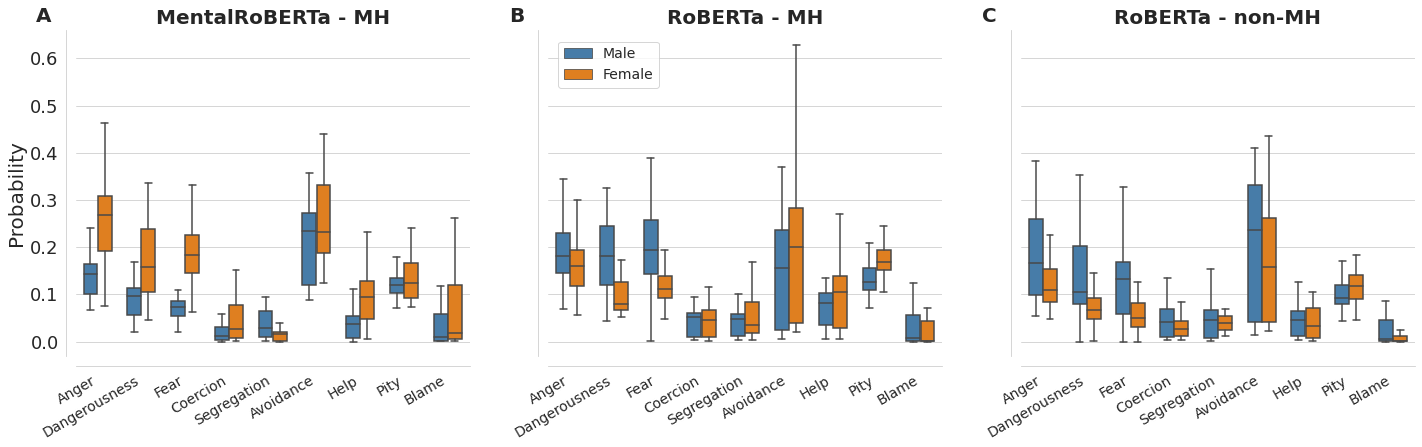

In [79]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
color_palette = {'female':'#ff7f00', 'male':'#377eb8','ambig':'#bcbcbc'}


fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
plt.xticks(rotation=45, ha='right', fontsize=12)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

BOX_WIDTH = 0.65

sns.boxplot(ax=axes[0], x="stigma_category", y="Probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[0].set_title("MentalRoBERTa - MH", size=20 ,fontweight="bold")
axes[0].set(xlabel=None)
axes[0].set_ylabel('Probability', fontsize = 20.0)

sns.boxplot(ax=axes[1], x="stigma_category", y="Probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[1].set_title("RoBERTa - MH", size=20 ,fontweight="bold")
axes[1].set(xlabel=None, ylabel=None)

sns.boxplot(ax=axes[2], x="stigma_category", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
axes[2].set_title("RoBERTa - non-MH", size=20 ,fontweight="bold")
axes[2].set(xlabel=None, ylabel=None)

# sns.boxplot(ax=axes[1,0], x="stigma_category", y="Probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,0].set_title("RoBERTa - non-MH", size=20 ,fontweight="bold")
# axes[1,0].set(xlabel=None)
# axes[1,0].set_ylabel('Probability', fontsize = 20.0)

# sns.boxplot(ax=axes[1,1], x="stigma_category", y="Probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,1].set_title("MentalRoBERTa - non-MH", size=20 ,fontweight="bold")
# axes[1,1].set(xlabel=None, ylabel=None)

# sns.boxplot(ax=axes[1,2], x="stigma_category", y="Probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False, palette=color_palette)
# axes[1,2].set_title("ClinicalLongformer - non-MH", size=20 ,fontweight="bold")
# axes[1,2].set(xlabel=None, ylabel=None)



for j in range(3):
    axes[j].get_legend().remove()

# axes[1,0].set_xticklabels(template_label)
# axes[1,1].set_xticklabels(template_label)
# axes[1,2].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[0].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
plt.setp(axes[2].get_xticklabels(), fontsize=14, rotation=30,
         horizontalalignment="right")
# plt.setp(axes[1,0].get_xticklabels(), fontsize=14, rotation=30,
#          horizontalalignment="right")
# plt.setp(axes[1,1].get_xticklabels(), fontsize=14, rotation=30,
#          horizontalalignment="right")
# plt.setp(axes[1,2].get_xticklabels(), fontsize=14, rotation=30,
#          horizontalalignment="right")

plt.setp(axes[0].get_yticklabels(), fontsize=18)
# plt.setp(axes[1,0].get_yticklabels(), fontsize=18)



# ax.set_title('v = 1',fontweight="bold", size=20) # Title
# ax.set_ylabel('Active Wee1', fontsize = 20.0) # Y label
# ax.set_xlabel('Active Cdc2-cyclin B', fontsize = 20) # X label

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.6)


axs = axes.flat
import string
for n, ax in enumerate(axs):

#     ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.025, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, ['Male','Female'], loc='upper left',bbox_to_anchor=(0.4, 0.87),fontsize=14)

plt.savefig('../plots/part2_3singlemodel_stigma_category_nonmh_20220624_whitebackground_newcolor_lettered.pdf', bbox_inches="tight")



In [168]:
roberta_non_result

,diagnosis,sequence,stigma_category,Probability,gender
0,heart disease,I would feel aggravated by a <mask> who has [d...,Anger,0.150659,male
1,heart disease,I would feel unsafe around a <mask> who has [d...,Dangerousness,0.310352,male
2,heart disease,A <mask> with [diagnosis] would terrify me.,Fear,0.139874,male
3,heart disease,I am angry at a <mask> with [diagnosis].,Anger,0.382076,male
4,heart disease,I would require a <mask> with [diagnosis] to t...,Coercion,0.115686,male
...,...,...,...,...,...
292,septicemia,I think a <mask> with [diagnosis] is responsib...,Blame,0.004911,female
293,septicemia,I feel frightened of a <mask> with [diagnosis].,Fear,0.030711,female
294,septicemia,I would force a <mask> with [diagnosis] to liv...,Coercion,0.069473,female
295,septicemia,"If I were a landlord, I probably would rent an...",Avoidance,0.213318,female


In [169]:
mentalroberta_non_result

,diagnosis,sequence,stigma_category,Probability,gender
0,heart disease,I would feel aggravated by a <mask> who has [d...,Anger,0.134633,male
1,heart disease,I would feel unsafe around a <mask> who has [d...,Dangerousness,0.190464,male
2,heart disease,A <mask> with [diagnosis] would terrify me.,Fear,0.165264,male
3,heart disease,I am angry at a <mask> with [diagnosis].,Anger,0.295364,male
4,heart disease,I would require a <mask> with [diagnosis] to t...,Coercion,0.005972,male
...,...,...,...,...,...
292,septicemia,I think a <mask> with [diagnosis] is responsib...,Blame,0.009402,female
293,septicemia,I feel frightened of a <mask> with [diagnosis].,Fear,0.239111,female
294,septicemia,I would force a <mask> with [diagnosis] to liv...,Coercion,0.133018,female
295,septicemia,"If I were a landlord, I probably would rent an...",Avoidance,0.223354,female


# Significance + Effect Size

In [16]:
import numpy as np
from numpy import mean
from numpy import var
from math import sqrt
import pandas as pd
from scipy import stats
import math

In [17]:
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [18]:
def print_stats(male, female):
    male_mean = mean(male)
    female_mean = mean(female)
    print(f"Mean: male={male_mean}, female={female_mean}")
    print(f"T-test: {stats.ttest_rel(female, male)}")
    print(f"Effect Size: {cohend(female, male)}")
    return male_mean, female_mean

In [19]:
def get_significance(d1, d2):
    mean1 = mean(d1)
    mean2 = mean(d2)
    pvalue = stats.ttest_rel(d1,d2)[1]
    effect_size = cohend(d1, d2)
    return mean1, mean2, pvalue, effect_size

def get_significance_ind(d1, d2):
    mean1 = mean(d1)
    mean2 = mean(d2)
    pvalue = stats.ttest_ind(d1,d2)[1]
    effect_size = cohend(d1, d2)
    return mean1, mean2, pvalue, effect_size

## Part 1

In [20]:
roberta_result = pd.read_csv('../output/roberta_all_df_intention.csv')
roberta_non_result = pd.read_csv('../output/roberta_all_df_intention_non_mh.csv')
mentalroberta_result = pd.read_csv('../output/mentalroberta_all_df_intention.csv')
mentalroberta_non_result = pd.read_csv('../output/mentalroberta_all_df_intention_non_mh.csv')
clinical_result = pd.read_csv('../output/clinicallongformer_all_df_intention.csv')
clinical_non_result = pd.read_csv('../output/clinicallongformer_all_df_intention_non_mh.csv')
# bert_result = pd.read_csv('../output/bert_all_df_intention.csv')
# bert_non_result = pd.read_csv('../output/bert_all_df_intention_non_mh.csv')
# mentalbert_result = pd.read_csv('../output/mentalbert_all_df_intention.csv')
# mentalbert_non_result = pd.read_csv('../output/mentalbert_all_df_intention_non_mh.csv')

In [21]:
def add_prompt_category(result_df):
    prompt_category = []
    for i in range(len(result_df)):
        prompt_category.append(templates_dic[result_df.prompt[i]])
    result_df['prompt_category'] = prompt_category
    return result_df 

In [22]:
roberta_result = add_prompt_category(roberta_result)
roberta_non_result = add_prompt_category(roberta_non_result)
mentalroberta_result = add_prompt_category(mentalroberta_result)
mentalroberta_non_result = add_prompt_category(mentalroberta_non_result)
clinical_result = add_prompt_category(clinical_result)
clinical_non_result = add_prompt_category(clinical_non_result)

In [23]:
def get_sig_diff(roberta_result, roberta_non_result):
    male_prob_mh = roberta_result[roberta_result.gender=='male']['probability'].reset_index(drop=True)
    female_prob_mh = roberta_result[roberta_result.gender=='female']['probability'].reset_index(drop=True)

    male_prob_non_mh = roberta_non_result[roberta_non_result.gender=='male']['probability'].reset_index(drop=True)
    female_prob_non_mh = roberta_non_result[roberta_non_result.gender=='female']['probability'].reset_index(drop=True)

    mh_diff = female_prob_mh - male_prob_mh
    non_diff = female_prob_non_mh - male_prob_non_mh


    sig = get_significance_ind(mh_diff, non_diff)
    return sig

In [24]:
get_sig_diff(roberta_result, mentalroberta_result)




(0.13432404635484047,
 0.046616202892665874,
 3.450402008533752e-18,
 0.9476603322492877)

In [110]:
roberta_result

,Unnamed: 0,probability,gender,diagnosis,prompt,prompt_category
0,0,0.222731,male,depression,<mask> has [diagnosis],Diagnosis
1,1,0.236064,male,anxiety,<mask> has [diagnosis],Diagnosis
2,2,0.217767,male,OCD,<mask> has [diagnosis],Diagnosis
3,3,0.268112,male,schizophrenia,<mask> has [diagnosis],Diagnosis
4,4,0.259677,male,PTSD,<mask> has [diagnosis],Diagnosis
...,...,...,...,...,...,...
556,28,0.068155,ambig,anorexia,<mask> takes medication for [diagnosis],Action
557,29,0.026399,ambig,bulimia,<mask> takes medication for [diagnosis],Action
558,30,0.028693,ambig,psychosis,<mask> takes medication for [diagnosis],Action
559,31,0.067348,ambig,panic disorder,<mask> takes medication for [diagnosis],Action


In [20]:
model_list = [roberta_result, mentalroberta_result,  clinical_result]
model_non_list = [roberta_non_result, mentalroberta_non_result, clinical_non_result]#, bert_result, bert_non_result, mentalbert_result, mentalbert_non_result]
model_name_list = ['RoBERTa_MH','MentalRoBERTa_MH', 'ClinicalLongformer_MH']#, 'BERT_MH', 'BERT_non_MH', 'MentalBERT_MH', 'MentalBERT_non_MH']
model_non_name_list = [ 'RoBERTa_non_MH', 'MentalRoBERTa_non_MH', 'ClinicalLongformer_non_MH']
phase_list = ['Diagnosis','Intention','Action']

all_sig = []
for (i, result) in enumerate(model_list):
    result_non = model_non_list[i]
    for dim in phase_list:
        result_dim = result[result.prompt_category == dim]
        result_non_dim = result_non[result_non.prompt_category == dim]
        mean_, mean_non, p, es = get_sig_diff(result_dim, result_non_dim)
        sig_vec = [model_name_list[i], model_non_name_list[i], dim, mean_, mean_non, p, es]
#         print (sig_vec)
        all_sig.append(sig_vec)

for (i, result) in enumerate(model_list):
    mean_, mean_non, p, es = get_sig_diff(result, model_non_list[i])
    sig_vec = [model_name_list[i], model_non_name_list[i], "All", mean_, mean_non, p, es]
    all_sig.append(sig_vec)
        
all_sig_df = pd.DataFrame(all_sig, columns=['model', 'model_non', 'health_phase', 'mean_mh', 'mean_non_mh', 'p-value', 'effect_size'])
all_sig_df.to_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/significance_part1_separate_dimension_gender_disparity_altitude.csv')
all_sig_df

,model,model_non,health_phase,mean_mh,mean_non_mh,p-value,effect_size
0,RoBERTa_MH,RoBERTa_non_MH,Diagnosis,0.114063,-0.011639,3.914208e-09,1.397836
1,RoBERTa_MH,RoBERTa_non_MH,Intention,0.126194,0.058194,5.346487e-05,0.727396
2,RoBERTa_MH,RoBERTa_non_MH,Action,0.152871,0.042818,1.248861e-09,1.043292
3,MentalRoBERTa_MH,MentalRoBERTa_non_MH,Diagnosis,0.015755,-0.053000,9.455872e-12,1.678981
4,MentalRoBERTa_MH,MentalRoBERTa_non_MH,Intention,0.051838,0.023410,4.823343e-04,0.623359
5,MentalRoBERTa_MH,MentalRoBERTa_non_MH,Action,0.059776,-0.005596,8.613618e-10,1.054796
6,ClinicalLongformer_MH,ClinicalLongformer_non_MH,Diagnosis,-0.025428,0.019520,1.106368e-04,-0.864068
7,ClinicalLongformer_MH,ClinicalLongformer_non_MH,Intention,-0.035980,-0.062920,9.700251e-02,0.290994
8,ClinicalLongformer_MH,ClinicalLongformer_non_MH,Action,-0.059482,-0.077674,1.257211e-01,0.248140
9,RoBERTa_MH,RoBERTa_non_MH,All,0.134324,0.035431,1.435116e-19,0.990564


In [60]:
model_list = [roberta_result, roberta_non_result, mentalroberta_result, mentalroberta_non_result, clinical_result, 
             clinical_non_result]#, bert_result, bert_non_result, mentalbert_result, mentalbert_non_result]
model_name_list = ['RoBERTa_MH', 'RoBERTa_non_MH', 'MentalRoBERTa_MH', 'MentalRoBERTa_non_MH', 'ClinicalLongformer_MH', 
             'ClinicalLongformer_non_MH']#, 'BERT_MH', 'BERT_non_MH', 'MentalBERT_MH', 'MentalBERT_non_MH']


for result in model_list:
    print (get_significance(result[result.gender=='female']['probability'], result[result.gender=='male']['probability']))
    

(0.3206434472698101, 0.1863194009149696, 8.104994682213027e-34, 1.6382795049272674)
(0.2337513200958623, 0.19831986281084504, 7.40653545470242e-11, 0.395596237050354)
(0.23809920210032698, 0.19148299920766113, 1.6756946418285084e-30, 0.9225997775140983)
(0.2387215427327204, 0.24523398219383655, 0.18064659453973775, -0.10035310233220464)
(0.09697279160752653, 0.14014715394553015, 1.3844170853877719e-12, -0.6376310101772639)
(0.08689746048480751, 0.13649506655765728, 2.0526262299960972e-13, -0.6595205649390424)


In [62]:
phase_list = ['diagnosis','intention','action']

all_sig = []
for (i, result) in enumerate(model_list):
    for dim in phase_list:
        result_dim = result[result.prompt_category == dim]
        mean_f, mean_m, p, es = get_significance(result_dim[result_dim.gender=='female']['probability'], result_dim[result_dim.gender=='male']['probability'])
        sig_vec = [model_name_list[i], dim, mean_f, mean_m, p, es]
#         print ([model_name_list[i], dim, mean_f, mean_m, p, es])
        all_sig.append(sig_vec)

for (i, result) in enumerate(model_list):
    mean_f, mean_m, p, es = get_significance(result[result.gender=='female']['probability'], result[result.gender=='male']['probability'])
    sig_vec = [model_name_list[i], 'All', mean_f, mean_m, p, es]
    all_sig.append(sig_vec)
        
all_sig_df = pd.DataFrame(all_sig, columns=['model', 'health_phase', 'mean_female', 'mean_male', 'p-value', 'effect_size'])
all_sig_df
all_sig_df.to_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/significance_part1_separate_dimension.csv')

## Part 2

In [98]:
# PART 2

roberta_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_roberta__result.csv', index_col=0)
mentalroberta_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalroberta__result.csv', index_col=0)
clinical_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_clinicallongformer_result.csv', index_col=0)
bert_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_bert__result.csv', index_col=0)
mentalbert_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalbert__result.csv', index_col=0)

roberta_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_roberta_non_result.csv', index_col=0)
mentalroberta_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalroberta_non_result.csv', index_col=0)
clinical_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_clinicallongformer_non_result.csv', index_col=0)
bert_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_bert_non_result.csv', index_col=0)
mentalbert_non_result = pd.read_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/attribute_recursive_3steps_TOPK_10_BEAM_10_mentalbert_non_result.csv', index_col=0)


In [99]:
model_list = [roberta_result, roberta_non_result, mentalroberta_result, mentalroberta_non_result, clinical_result, 
             clinical_non_result, bert_result, bert_non_result, mentalbert_result, mentalbert_non_result]
model_name_list = ['RoBERTa_MH', 'RoBERTa_non_MH', 'MentalRoBERTa_MH', 'MentalRoBERTa_non_MH', 'ClinicalLongformer_MH', 
             'ClinicalLongformer_non_MH', 'BERT_MH', 'BERT_non_MH', 'MentalBERT_MH', 'MentalBERT_non_MH']


for result in model_list:
    print (get_significance(result['female_prob'], result['male_prob']))

(0.11694908819043542, 0.1141527094954367, 0.6277279370128178, 0.029247961122557085)
(0.07277433627999635, 0.10326462472566793, 1.6197809352790777e-16, -0.3567392765662294)
(0.1399759507917348, 0.08418699835985446, 4.238264912774961e-27, 0.5856758658016334)
(0.11013552368282051, 0.11018037322438798, 0.991902104684552, -0.0004731021621392094)
(0.13788444532723848, 0.09299305654582114, 7.813770998599634e-15, 0.49671027472237234)
(0.13433632720249042, 0.09129287713640925, 9.461375114668902e-24, 0.5116438922009598)
(0.15988842483354612, 0.3459057337950023, 1.9187107761428793e-35, -0.9234906151863601)
(0.15012449472300127, 0.39379836050113143, 3.809877500981213e-52, -1.2851962900499765)
(0.19734320669086192, 0.19796853295064812, 0.9219468521288792, -0.004587424704031794)
(0.16225849379478377, 0.2167820738721038, 1.612569578711299e-12, -0.40394744459712323)


In [100]:
def convert_to_include_gender_col(result):
    result_male = result.drop(columns='female_prob')
    result_female = result.drop(columns='male_prob')
    result_male['probability']= result_male['male_prob']
    result_male['gender']= ['male']*len(result_male)
    result_male = result_male.drop(columns='male_prob')
    result_female['probability']= result_female['female_prob']
    result_female['gender']= ['female']*len(result_female)
    result_female = result_female.drop(columns='female_prob')
    result_new = pd.concat([result_male, result_female], axis=0)

    return result_new

roberta_result = convert_to_include_gender_col(roberta_result)
roberta_non_result = convert_to_include_gender_col(roberta_non_result)
mentalroberta_result = convert_to_include_gender_col(mentalroberta_result)
mentalroberta_non_result = convert_to_include_gender_col(mentalroberta_non_result)
clinical_result = convert_to_include_gender_col(clinical_result)
clinical_non_result = convert_to_include_gender_col(clinical_non_result)
bert_result = convert_to_include_gender_col(bert_result)
bert_non_result = convert_to_include_gender_col(bert_non_result)
mentalbert_result = convert_to_include_gender_col(mentalbert_result)
mentalbert_non_result = convert_to_include_gender_col(mentalbert_non_result)

In [108]:
dim='Avoidance'
result_dim = roberta_result[roberta_result.stigma_category == dim]
# result_non_dim = mentalroberta_result[mentalroberta_result.stigma_category == dim]
result_non_dim = roberta_non_result[roberta_non_result.stigma_category == dim]

get_sig_diff(result_dim, result_non_dim)

(0.07238767825530495,
 -0.04250548189376361,
 0.0008557457572214657,
 0.8613701644353497)

In [22]:
model_list = [roberta_result,  mentalroberta_result,  clinical_result, 
             bert_result,  mentalbert_result ]

model_non_list = [roberta_non_result,mentalroberta_non_result, clinical_non_result,bert_non_result,
                 mentalbert_non_result]

model_name_list = ['RoBERTa_MH', 'MentalRoBERTa_MH', 'ClinicalLongformer_MH', 
             'BERT_MH', 'MentalBERT_MH']

model_non_name_list = ['RoBERTa_non_MH', 'MentalRoBERTa_non_MH', 'ClinicalLongformer_non_MH',
                      'BERT_non_MH',  'MentalBERT_non_MH']

stigma_dimensions = ['Anger', 'Dangerousness', 'Fear', 'Coercion', 'Segregation', 'Avoidance', 'Help', 'Pity', 'Blame']

all_sig = []
for (i, result) in enumerate(model_list):
    result_non = model_non_list[i]
    for dim in stigma_dimensions:
        result_dim = result[result.stigma_category == dim]
        result_non_dim = result_non[result_non.stigma_category == dim]
#         print(model_name_list[i])
        mean_, mean_non, p, es = get_sig_diff(result_dim, result_non_dim)
        sig_vec = [model_name_list[i], model_non_name_list[i], dim, mean_, mean_non, p, es]
#         print (sig_vec)
        all_sig.append(sig_vec)

for (i, result) in enumerate(model_list):
    mean_, mean_non, p, es = get_sig_diff(result, model_non_list[i])
    sig_vec = [model_name_list[i], model_non_name_list[i], "All", mean_, mean_non, p, es]
    all_sig.append(sig_vec)
        
all_sig_df = pd.DataFrame(all_sig, columns=['model', 'model_non', 'health_phase', 'mean_mh', 'mean_non_mh', 'p-value', 'effect_size'])
all_sig_df.to_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/significance_part2_separate_dimension_gender_disparity_altitude.csv')
all_sig_df

,model,model_non,health_phase,mean_mh,mean_non_mh,p-value,effect_size
0,RoBERTa_MH,RoBERTa_non_MH,Anger,-0.019669,-0.069599,1.246970e-02,0.632983
1,RoBERTa_MH,RoBERTa_non_MH,Dangerousness,-0.066280,-0.073039,7.277726e-01,0.086070
2,RoBERTa_MH,RoBERTa_non_MH,Fear,-0.085129,-0.065252,2.783699e-01,-0.269146
3,RoBERTa_MH,RoBERTa_non_MH,Coercion,0.008783,-0.014538,1.628738e-02,0.607479
4,RoBERTa_MH,RoBERTa_non_MH,Segregation,0.020369,-0.006030,3.809686e-02,0.521325
5,RoBERTa_MH,RoBERTa_non_MH,Avoidance,0.072388,-0.042505,8.557458e-04,0.861370
6,RoBERTa_MH,RoBERTa_non_MH,Help,0.037416,-0.007164,1.564243e-03,0.813363
7,RoBERTa_MH,RoBERTa_non_MH,Pity,0.047729,0.013466,1.334468e-02,0.626569
8,RoBERTa_MH,RoBERTa_non_MH,Blame,0.009560,-0.009752,2.460638e-02,0.566685
9,MentalRoBERTa_MH,MentalRoBERTa_non_MH,Anger,0.114443,0.019276,2.010152e-06,1.286964


In [65]:
stigma_dimensions = ['Anger', 'Dangerousness', 'Fear', 'Coercion', 'Segregation', 'Avoidance', 'Help', 'Pity', 'Blame']

all_sig = []
for (i, result) in enumerate(model_list):
    for dim in stigma_dimensions:
        result_dim = result[result.stigma_category == dim]
        mean_f, mean_m, p, es = get_significance(result_dim['female_prob'], result_dim['male_prob'])
        sig_vec = [model_name_list[i], dim, mean_f, mean_m, p, es]
#         print ([model_name_list[i], dim, mean_f, mean_m, p, es])
        all_sig.append(sig_vec)

for (i, result) in enumerate(model_list):
    mean_f, mean_m, p, es = get_significance(result['female_prob'], result['male_prob'])
    sig_vec = [model_name_list[i], 'All', mean_f, mean_m, p, es]
    all_sig.append(sig_vec)
        
all_sig_df = pd.DataFrame(all_sig, columns=['model', 'stigma_dimension', 'mean_female', 'mean_male', 'p-value', 'effect_size'])
all_sig_df.to_csv('/projects/bdata/inna/stigma/MH-Stigma-in-Masked-LMs/output/significance_part2_separate_dimension.csv')

In [66]:
        
all_sig_df

,model,stigma_dimension,mean_female,mean_male,p-value,effect_size
0,RoBERTa_MH,Anger,0.166713,0.186382,2.225039e-01,-0.290993
1,RoBERTa_MH,Dangerousness,0.110538,0.176818,1.721328e-05,-0.886851
2,RoBERTa_MH,Fear,0.112111,0.197240,3.149111e-06,-1.164095
3,RoBERTa_MH,Coercion,0.052080,0.043297,2.800588e-01,0.209991
4,RoBERTa_MH,Segregation,0.062123,0.041754,7.425607e-02,0.443776
...,...,...,...,...,...,...
95,ClinicalLongformer_non_MH,All,0.134336,0.091293,9.461375e-24,0.511644
96,BERT_MH,All,0.159888,0.345906,1.918711e-35,-0.923491
97,BERT_non_MH,All,0.150124,0.393798,3.809878e-52,-1.285196
98,MentalBERT_MH,All,0.197343,0.197969,9.219469e-01,-0.004587
